In [5]:
import glob, sys, os, re, numpy as np
from matplotlib import pyplot as plt
from qpms import ScatteringSystem, TMatrixInterpolator, BaseSpec, FinitePointGroup, Particle, hbar, eV, c
from qpms.symmetries import point_group_info
import numpy as np
nm = 1e-9

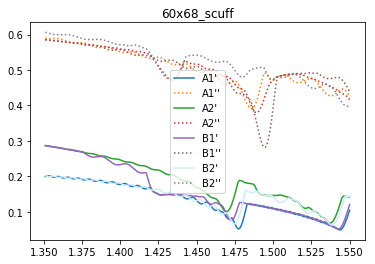

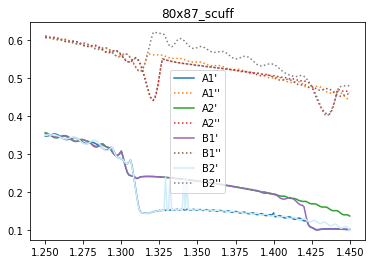

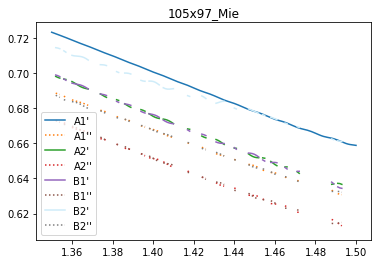

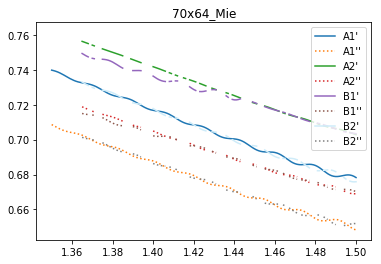

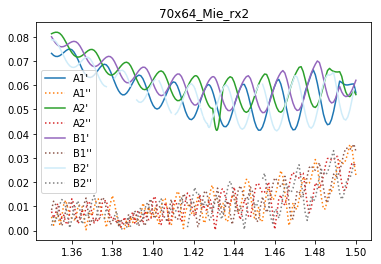

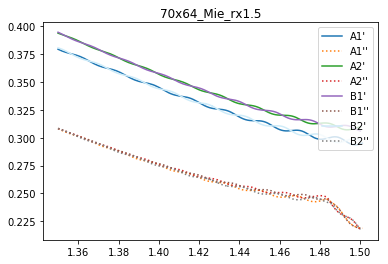

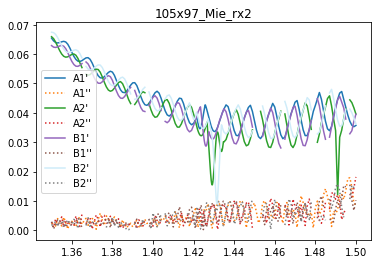

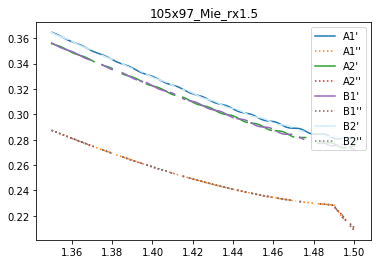

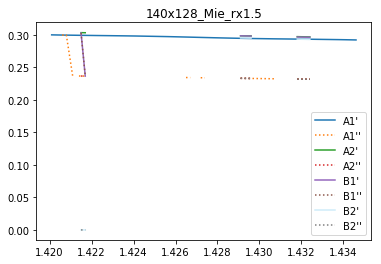

In [9]:
#filepatterns = ['/u/46/necadam1/unix/project/AaroBECfinite_sa/Nx60_Ny68_*_ir0.npz',]
filepatterns_note_pairs = [
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_sa/Nx60_Ny68_*_ir0.npz',],'60x68_scuff'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_sa/Nx80_Ny87_*_ir0.npz',],'80x87_scuff'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_sph/Nx105_Ny97_*_ir0.npz',],'105x97_Mie'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_sph/Nx70_Ny64_*_ir0.npz',],'70x64_Mie'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_fatsph/Nx70_Ny64_*_ir0_r90.856nm.npz',],'70x64_Mie_rx2'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_fatsph/Nx70_Ny64_*_ir0_r68.142nm.npz',],'70x64_Mie_rx1.5'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_fatsph/Nx105_Ny97_*_ir0_r90.856nm.npz',],'105x97_Mie_rx2'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_fatsph/Nx105_Ny97_*_ir0_r68.142nm.npz',],'105x97_Mie_rx1.5'),
(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_fatsph/Nx140_Ny128_*_ir0_r68.142nm.npz',],'140x128_Mie_rx1.5'),
#(['/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBECfinite_fatsph/Nx175_Ny161_*_ir0_r68.142nm.npz',],'175x161_Mie_rx1.5'),
]

for filepatterns, note in filepatterns_note_pairs:
    filenames = list()
    for pattern in filepatterns:
        filenames.extend([fn for fn in glob.glob(pattern)])
    len(filenames)
    irrepnames=["A1'", "A1''", "A2'", "A2''", "B1'", "B1''", "B2'", "B2''"]

    omegas = list()
    irminima = [list() for iri in range(8)]
    for filename in filenames:
        allirifilenames = [re.sub('ir0', 'ir%d'%iri, filename) for iri in range(8)]
        for iri in range(8):
            try:
              with np.load(allirifilenames[iri]) as data:
                irminima[iri].append(data['S'][-1])
                omega = data['omega'][()]
            except FileNotFoundError:
                irminima[iri].append(np.nan)
        omegas.append(omega)

    # sort omegas to have nice plots
    irminima = np.array(irminima)
    omegas = np.array(omegas)
    oo = np.argsort(omegas)
    omegas = omegas[oo]
    irminima = irminima[:,oo]

    plt.figure()
    for iri in range(8):
        plt.plot(omegas / eV * hbar, irminima[iri], label=irrepnames[iri], ls=':' if "''" in irrepnames[iri] else '-')
    plt.legend()
    plt.title(note)
    plt.savefig('/media/necadam1/5ea6a39a-b6c0-4caf-9a43-1093e07431f0/mmn/AaroBEC_figs/%s.pdf'%note)

In [102]:
px = 571e-9
py = 621e-9
n = 1.51
Ex_eV = 2*np.pi*c/px/n / eV*hbar
Ey_eV = 2*np.pi*c/py/n / eV*hbar
print(Ex_eV, Ey_eV)

1.437981436035388 1.322201932328835


In [75]:
np.nan

nan